In [2]:
#Importamos librerias necesarias:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud

In [3]:
#Importamos Dataset:
edx = pd.read_csv("Datasets/EDX.csv")

In [4]:
edx.head(5)

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort(hours_per_week),course_length(weeks),course_description,course_syllabus,course_url,certificate for(USD),enrolled_percent,segmento,course_effort(total_hours)
0,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,2442271,Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,12.0,12.0,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,90,5.363,1,144.0
1,IELTS Academic Test Preparation,Prepare for the IELTS Academic tests in this c...,1103777,Self-paced on your time,The University of Queensland,Iain Mathieson-Martin Dutton-Megan Yucel-Steph...,Introductory,Communication,English,English,7.5,8.0,IELTS is the world's most popular English lang...,MODULE 1: LISTENING\nThe module begins with an...,https://www.edx.org/course/ielts-academic-test...,99,2.424,1,60.0
2,TOEFL® Test Preparation: The Insider’s Guide,Prepare for the TOEFL® test and learn how to i...,1022489,Self-paced on your time,Educational Testing Service,Michael Knab-Cynthia Newman-Shawn Gorman-Molly...,Introductory,Communication,English,English,3.0,6.0,"This test preparation course, developed by the...",NaN,https://www.edx.org/course/toefl-test-preparat...,49,2.245,1,18.0
3,CS50's Web Programming with Python and JavaScript,"This course picks up where CS50 leaves off, di...",698950,Self-paced on your time,Harvard University,David J. Malan-Brian Yu,Intermediate,Computer Science,English,English,3.0,12.0,"Topics include database design, scalability, s...",NaN,https://www.edx.org/course/cs50s-web-programmi...,90,1.535,2,36.0
4,Introduction to Linux,Never learned Linux? Want a refresh? Develop a...,642088,Self-paced on your time,The Linux Foundation,Jerry Cooperstein,Introductory,Computer Science,English,English,3.0,14.0,Develop a good working knowledge of Linux usin...,NaN,https://www.edx.org/course/introduction-to-linux,199,1.410,2,42.0


In [5]:
#Para hacer un analisis de los segmentos:
#Seleccionamos las columnas relevantes para un primer analisis.

columnas = ["segmento", "course_effort(hours_per_week)", "course_length(weeks)", "course_effort(total_hours)", "certificate for(USD)"]

edxSegmentos = edx[columnas]

In [6]:
#Para agrupar las filas:
#Agrupamos en base al segmento al que pertenecen y obtenemos una media de todas las demas variables.
edxSegmentos = edxSegmentos.groupby("segmento").mean()
edxSegmentos

,course_effort(hours_per_week),course_length(weeks),course_effort(total_hours),certificate for(USD)
segmento,,,,
1,7.500000,8.666667,74.000000,79.333333
2,3.000000,9.900000,29.700000,111.800000
3,3.766667,7.333333,27.833333,119.133333
4,5.586957,9.826087,56.847826,148.695652
5,4.525641,6.897436,32.525641,111.974359
6,3.877358,7.830189,33.698113,118.660377
7,4.014085,7.394366,29.676056,105.859155
8,3.836634,7.574257,30.851485,91.089109
9,4.226708,6.478261,28.273292,102.062112


In [7]:
#Para ver la cantidad de elementos que pertenecen a cada segmento:
edxSegmentos['cantidad_elementos'] = edx.groupby('segmento').size().values

In [8]:
#Vemos que los primeros 3 segmentos suman 28 elementos, es el tamaño de muestra que estamos buscando.
edxSegmentos

,course_effort(hours_per_week),course_length(weeks),course_effort(total_hours),certificate for(USD),cantidad_elementos
segmento,,,,,
1,7.500000,8.666667,74.000000,79.333333,3
2,3.000000,9.900000,29.700000,111.800000,10
3,3.766667,7.333333,27.833333,119.133333,15
4,5.586957,9.826087,56.847826,148.695652,23
5,4.525641,6.897436,32.525641,111.974359,39
6,3.877358,7.830189,33.698113,118.660377,53
7,4.014085,7.394366,29.676056,105.859155,71
8,3.836634,7.574257,30.851485,91.089109,101
9,4.226708,6.478261,28.273292,102.062112,161


In [9]:
#Para resetear index:
#Con el fin de utilizar la columna segmento en las graficas.
edxSegmentos = edxSegmentos.reset_index()

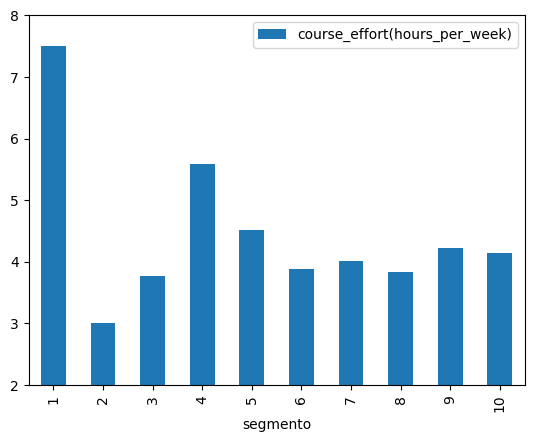

In [10]:
#Para ver el comportamiento de la variable course_effort(hours_per_week) en cada segmento:
#Vemos que los cursos mas exitosos tienen una carga horaria de 7,5 horas por semana aproximadamente.
#Los siguen cursos con carga horaria de dos y menos de cuatro horas por semana en los grupos 2 y 3 respectivamente.
#No se puede afirmar con seguridad que la carga horaria tenga incidencia en el exito del curso.
edxSegmentos.plot(x='segmento', y='course_effort(hours_per_week)', kind='bar')

plt.ylim(2, 8)

plt.show()

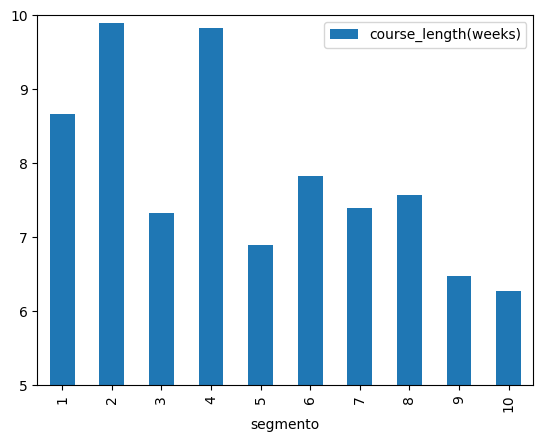

In [11]:
#Para ver el comportamiento de la variable course_length(weeks) en cada segmento:
#Vemos que, segun el comportamiento general, los cursos de mas semanas tienden a ser mas exitosos.
edxSegmentos.plot(x='segmento', y='course_length(weeks)', kind='bar')

plt.ylim(5, 10)

plt.show()

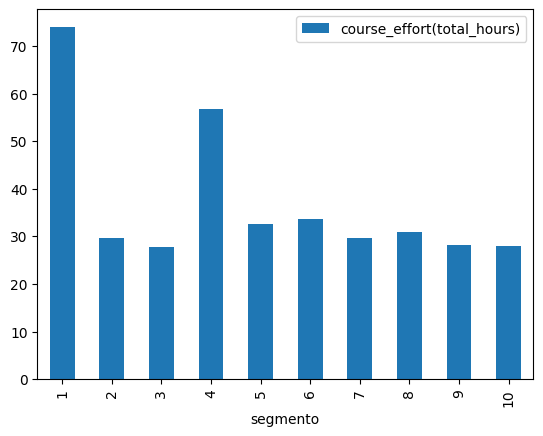

In [12]:
#Para ver el comportamiento de la variable course_effort(total_hours) en cada segmento:
#Los cursos mas exitosos tienden a tener mas carga horaria.
edxSegmentos.plot(x='segmento', y='course_effort(total_hours)', kind='bar')

#plt.ylim(2, 8)

plt.show()

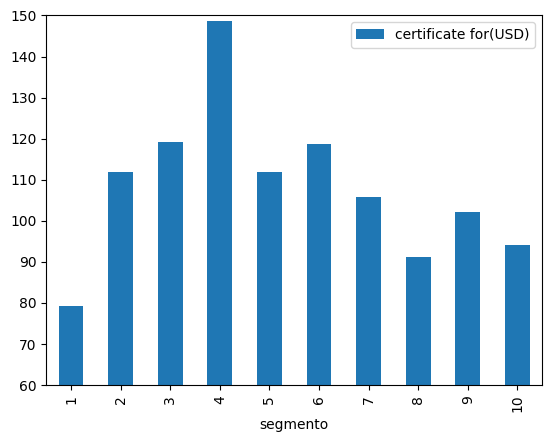

In [13]:
#Para ver el comportamiento de la variable certificate for(USD) en cada segmento:
#Podemos ver que los cursos del segmento 1 son economicos.
edxSegmentos.plot(x='segmento', y='certificate for(USD)', kind='bar')

plt.ylim(60, 150)

plt.show()

In [14]:
#Para completar nuestro analisis con mas datos:
#Agregamos los valores de las columnas subjects, course_type, Level y language.
edxSegmentos['subjects'] = edx.groupby('segmento').agg({'subject': lambda x: ', '.join(sorted(set(x)))}).values

edxSegmentos['course_type'] = edx.groupby('segmento').agg({'course_type': lambda x: ', '.join(sorted(set(x)))}).values

edxSegmentos['Level'] = edx.groupby('segmento').agg({'Level': lambda x: ', '.join(sorted(set(x)))}).values

edxSegmentos['language'] = edx.groupby('segmento').agg({'language': lambda x: ', '.join(sorted(set(x)))}).values

In [15]:
edxSegmentos.head(3)

,segmento,course_effort(hours_per_week),course_length(weeks),course_effort(total_hours),certificate for(USD),cantidad_elementos,subjects,course_type,Level,language
0,1,7.500000,8.666667,74.000000,79.333333,3,"Communication, Computer Science",Self-paced on your time,Introductory,English
1,2,3.000000,9.900000,29.700000,111.800000,10,"Architecture, Biology & Life Sciences, Busines...",Self-paced on your time,"Intermediate, Introductory",English
2,3,3.766667,7.333333,27.833333,119.133333,15,"Business & Management, Communication, Computer...",Self-paced on your time,"Advanced, Intermediate, Introductory","English, Español"


In [16]:
#Creamos un visualizador que nos permitira ver los valores de las variables de los tres primeros segmentos:
def visualizador(columna):
    print("Segmento 1: ", edxSegmentos[columna][0])
    print("Segmento 2: ", edxSegmentos[columna][1])
    print("Segmento 3: ", edxSegmentos[columna][2])

In [17]:
#Vemos que en la columna subjects, los cursos mas exitosos son de comunicacion y computer science.
#Los siguen cursos en arquitectura, biologia, negocios, data analysis, humanidades y ciencias sociales.
visualizador("subjects")

Segmento 1:  Communication, Computer Science
Segmento 2:  Architecture, Biology & Life Sciences, Business & Management, Communication, Computer Science, Data Analysis & Statistics, Humanities, Social Sciences
Segmento 3:  Business & Management, Communication, Computer Science, Data Analysis & Statistics, Humanities


In [18]:
#En general, los cursos mas exitosos son de clases pregrabadas en las que el alumno puede ir a su propio ritmo.
visualizador("course_type")

Segmento 1:  Self-paced on your time
Segmento 2:  Self-paced on your time
Segmento 3:  Self-paced on your time


In [19]:
#Sobre los niveles no se puede afirmar mucho, en general, avanzados, intermedios e introductorios pueden ser exitosos.
visualizador("Level")

Segmento 1:  Introductory
Segmento 2:  Intermediate, Introductory
Segmento 3:  Advanced, Intermediate, Introductory


In [20]:
#El idioma mas predominante es el ingles, pero esto dependera de a que publico apunta la institucion en cuestion.
visualizador("language")

Segmento 1:  English
Segmento 2:  English
Segmento 3:  English, Español


In [21]:
#Para visualizar los titulos de los cursos mas exitosos:
TitulosSegmento1 = []
TitulosSegmento2 = []
TitulosSegmento3 = []

for i in range(len(edx)):
    if edx.loc[i, "segmento"] == 1:
        TitulosSegmento1.append(edx.loc[i,"title"])
    if edx.loc[i, "segmento"] == 2:
        TitulosSegmento2.append(edx.loc[i,"title"])
    if edx.loc[i, "segmento"] == 3:
        TitulosSegmento3.append(edx.loc[i,"title"])

In [22]:
#Para visualizar los titulos del segmento 1:
TitulosSegmento1

["CS50's Introduction to Computer Science",
 'IELTS Academic Test Preparation',
 'TOEFL® Test Preparation: The Insider’s Guide']

In [23]:
#Para visualizar los titulos del segmento 2:
TitulosSegmento2

["CS50's Web Programming with Python and JavaScript",
 'Introduction to Linux',
 'Data Science: R Basics',
 'The Science of Happiness',
 'Contract Law: From Trust to Promise to Contract',
 'The Architectural Imagination',
 'Basic Spanish 1: Getting Started',
 'Justice',
 'Fundamentals of Neuroscience, Part 1: The Electrical Properties of the Neuron',
 "CS50's Introduction to Game Development"]

In [24]:
#Para visualizar los titulos del segmento 3:
TitulosSegmento3

['HTML5 and CSS Fundamentals',
 'Introduction to Java Programming: Starting to code in Java',
 'Academic and Business Writing',
 'Rhetoric: The Art of Persuasive Writing and Public Speaking',
 'The Science of Everyday Thinking',
 'Statistics and R',
 'How to Write an Essay',
 'Gestión de Proyectos de Desarrollo',
 'Introduction to Project Management',
 '生活英语听说 | Conversational English Skills',
 'Programming for Everybody (Getting Started with Python)',
 'Excel: Fundamentos y herramientas',
 'Data Science: Machine Learning',
 'Introduction to Java Programming – Part 1',
 'Python for Data Science']

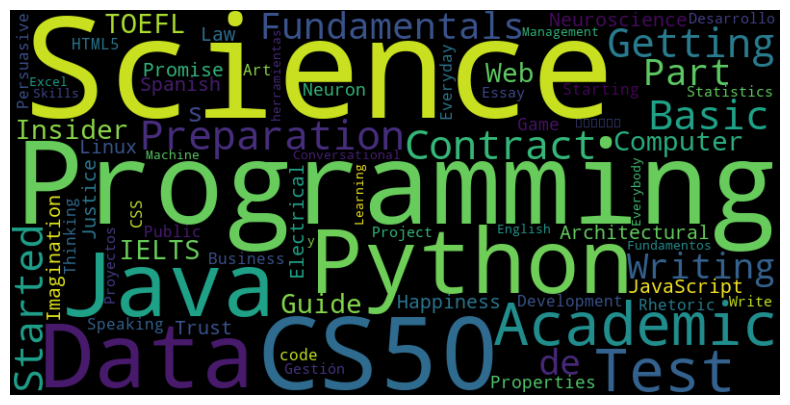

In [25]:
#Para crear una nube de palabras con los titulos:
texto = ' '.join(TitulosSegmento1 + TitulosSegmento2 + TitulosSegmento3)

#Para eliminar palabras que se repiten y no hacen al contenido:
palabras_a_eliminar = ["Introduction"]

for palabra in palabras_a_eliminar:
    texto = texto.replace(palabra, "")

# Para crear el objeto WordCloud y generar la nube de palabras:
wordcloud = WordCloud(width=800, height=400).generate(texto)

# Para mostrar la nube de palabras utilizando Matplotlib:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
#Para analizar la correlacion entre las variables numericas:
columnas = ["n_enrolled", "course_effort(total_hours)", "certificate for(USD)"]

edxCorrelacion = edx[columnas]

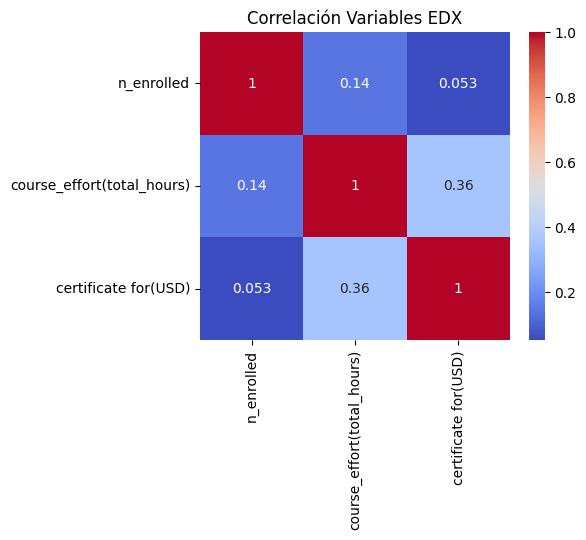

In [27]:
# Para calcular la matriz de correlación
correlation_matrix = edxCorrelacion.corr()

# Para crear el heatmap
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Para configurar el título del gráfico
plt.title('Correlación Variables EDX')

# Para mostrar el gráfico
plt.show()

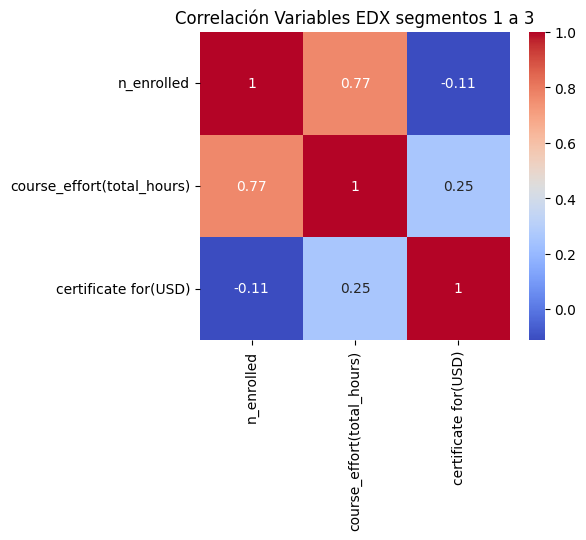

In [28]:
#Para analizar el comportamiento de las variables de nuestro segmento objetivo:
segmentoObjetivo = edx[edx["segmento"].isin([1, 2, 3])]

edxSegCorrelacion = segmentoObjetivo[columnas]

# Para calcular la matriz de correlación
correlation_matrix = edxSegCorrelacion.corr()

# Para crear el heatmap
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Para configurar el título del gráfico
plt.title('Correlación Variables EDX segmentos 1 a 3')

# Para mostrar el gráfico
plt.show()

#Vemos que, en este segmento, hay una correlacion fuerte entre course_effort(total_hours) y n_enrolled.

In [29]:
#Para ver cuales son los temas de los cursos mas importantes: 
SumSubj = edx.groupby("subject")["n_enrolled"].sum()

PromSubj = (edx.groupby("subject")["n_enrolled"].mean()).round(2)

CountSubj = edx["subject"].value_counts()

CountSubj = CountSubj.sort_index()

Subjects = pd.DataFrame({"Subject": SumSubj.index, "SumatoriaEnrolled": SumSubj.values, "PromedioEnrolled": PromSubj.values,"CountCursos": CountSubj.values})

In [30]:
#Computer Science, Bussiness and Management y Communication son los temas mas importantes en terminos de cantidad de alumnos.
Subjects.sort_values("SumatoriaEnrolled", ascending=False).head(5)

,Subject,SumatoriaEnrolled,PromedioEnrolled,CountCursos
6,Computer Science,12447737,82984.91,150
3,Business & Management,7076563,48469.61,146
5,Communication,4641327,132609.34,35
7,Data Analysis & Statistics,4264412,71073.53,60
19,Humanities,3504140,56518.39,62


In [31]:
#Communication, Architecture y Computer Science son los temas mas importantes en terminos de cantidad de alumno promedio por curso.
Subjects.sort_values("PromedioEnrolled", ascending=False).head(5)

,Subject,SumatoriaEnrolled,PromedioEnrolled,CountCursos
5,Communication,4641327,132609.34,35
0,Architecture,456611,114152.75,4
6,Computer Science,12447737,82984.91,150
7,Data Analysis & Statistics,4264412,71073.53,60
19,Humanities,3504140,56518.39,62


In [32]:
#Para ver cuales son los lenguajes mas importantes:
SumLang = edx.groupby("language")["n_enrolled"].sum()

PromLang = (edx.groupby("language")["n_enrolled"].mean()).round(2)

CountLang = edx["language"].value_counts()

CountLang = CountLang.sort_index()

Language = pd.DataFrame({"Language": SumLang.index, "SumatoriaEnrolled": SumLang.values, "PromedioEnrolled": PromLang.values,"CountCursos": CountLang.values})

In [33]:
#En esta plataforma la gran mayoria de los cursos e inscriptos estan en ingles y español.
Language.sort_values("SumatoriaEnrolled", ascending=False).head(5)

,Language,SumatoriaEnrolled,PromedioEnrolled,CountCursos
1,English,41215599,59388.47,694
2,Español,3704975,25908.92,143
4,Italiano,281585,70396.25,4
3,Français,161848,26974.67,6
7,日本語,62757,62757.00,1


In [34]:
#El italiano y el chino tienen los promedios de inscriptos por curso mas altos pero esto se debe a que son pocos los cursos.
Language.sort_values("PromedioEnrolled", ascending=False).head(5)

,Language,SumatoriaEnrolled,PromedioEnrolled,CountCursos
4,Italiano,281585,70396.25,4
7,日本語,62757,62757.00,1
1,English,41215599,59388.47,694
3,Français,161848,26974.67,6
2,Español,3704975,25908.92,143


In [35]:
#Para analizar la distribucion del tipo de curso:
SumType = edx.groupby("course_type")["n_enrolled"].sum()

PromType = (edx.groupby("course_type")["n_enrolled"].mean()).round(2)

CountType = edx["course_type"].value_counts()

CountType = CountType.sort_index()

Types = pd.DataFrame({"Type": SumType.index, "SumatoriaEnrolled": SumType.values, "PromedioEnrolled": PromType.values,"CountCursos": CountType.values})

In [36]:
#Vemos que los cursos self-paced on your time son mas populares tanto en sumatoria como en promedio.
Types.sort_values("SumatoriaEnrolled", ascending=False).head(5)

,Type,SumatoriaEnrolled,PromedioEnrolled,CountCursos
1,Self-paced on your time,43166828,53623.39,805
0,Instructor-led on a course schedule,2370772,47415.44,50
